In [127]:
import torch
import numpy as np
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys
sys.path.append("..")
from Procrustes import ProcrustesDistance

In [128]:
# Make N look like M
def train_2d_to_2d(N, M, epochs=750):
    optimizer = torch.optim.Adam([N], lr=1e-2)
    metric = ProcrustesDistance()

    plt.figure(figsize=(6, 6))
    plt.scatter(M[:, 0], M[:, 1], s=1, label='Chaos', color='blue')
    plt.scatter(N.detach()[:, 0], N.detach()[:, 1], s=1, label='Trained Neurons', color='red')
    plt.title("Chaos vs Trained Matrix")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.legend()
    plt.show()
    for i in range(epochs):
        optimizer.zero_grad()
        loss = metric(N, M)
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(f"Procrustes Distance: {loss.item():.4f}")
            plt.figure(figsize=(6, 6))
            plt.scatter(M[:, 0], M[:, 1], s=1, label='Chaos', color='blue')
            plt.scatter(N.detach()[:, 0], N.detach()[:, 1], s=1, label='Trained Neurons', color='red')
            plt.title("Chaos vs Trained Matrix")
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.axis('equal')
            plt.legend()
            plt.show()
    print(f"Final Procrustes Distance between A and B: {metric(N, M).item():.4f}")

In [129]:
chaos = torch.tensor(pd.read_csv("chaos_cursive.csv", header=None).to_numpy(), dtype=torch.float64).T
print(f"Chaos shape: {chaos.shape}")

Chaos shape: torch.Size([1322, 2])


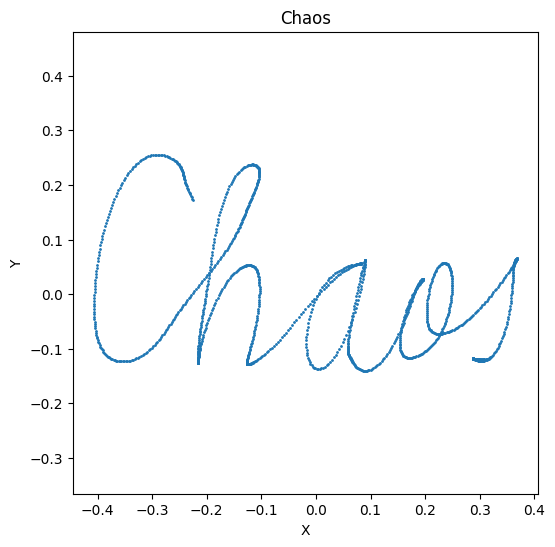

In [130]:
# Display the word
def visualize(word, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(word[:, 0], word[:, 1], s=1)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.show()
visualize(chaos, "Chaos")

torch.Size([1322, 2]) torch.Size([1322, 2])


/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_14210/3537660638.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_2d_to_2d(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)


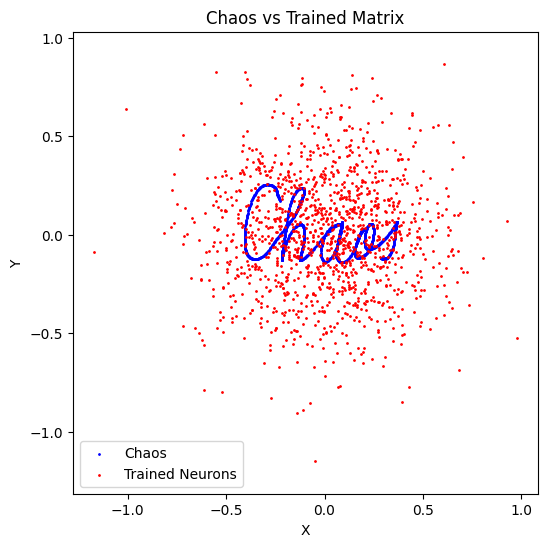

Procrustes Distance: 17.7214


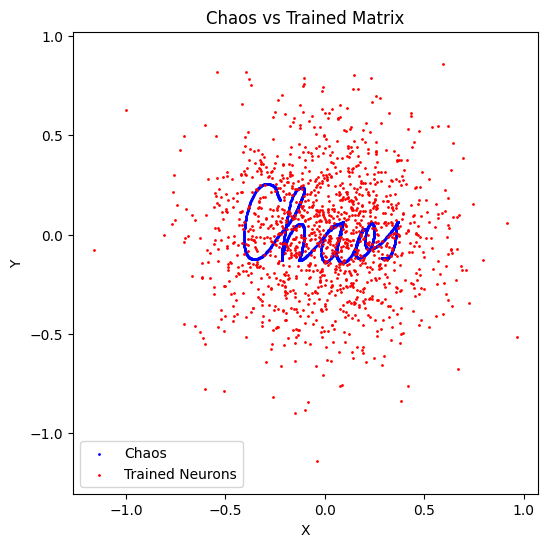

Procrustes Distance: 3.7731


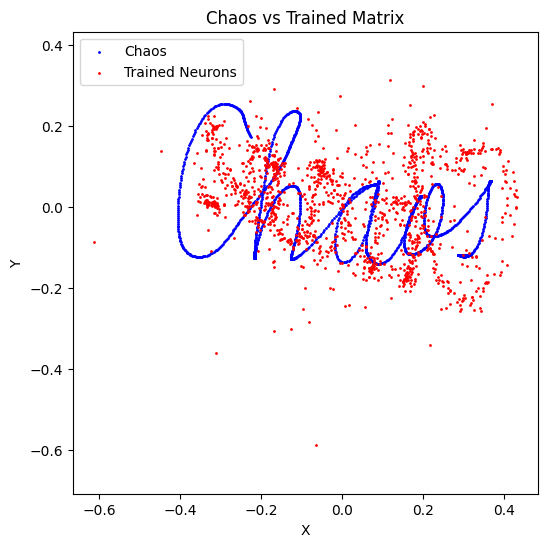

Procrustes Distance: 0.1228


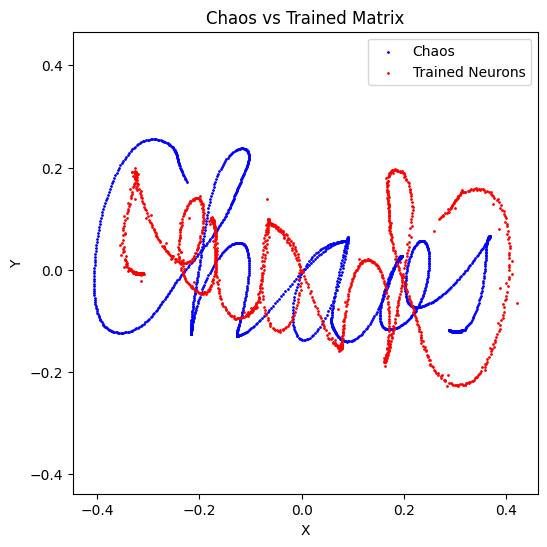

Procrustes Distance: 0.0293


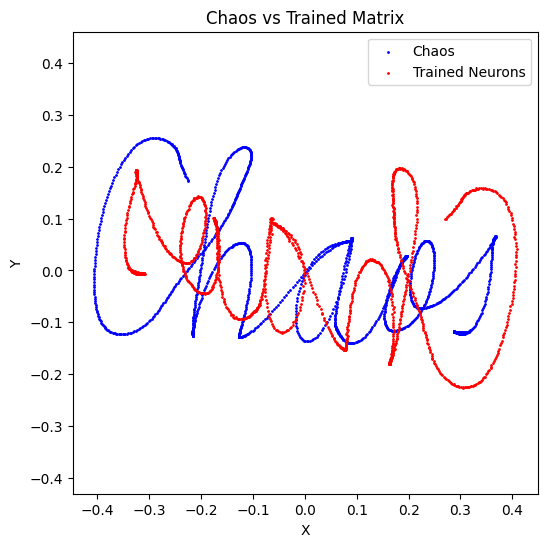

Final Procrustes Distance between A and B: 0.0214


In [131]:
neurons = torch.normal(mean=0, std=0.3, size=(1322, 2), requires_grad=True)
print(neurons.shape, chaos.shape)
train_2d_to_2d(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)

Trained Neurons shape: torch.Size([1322, 2])
Chaos shape: torch.Size([1322, 2])


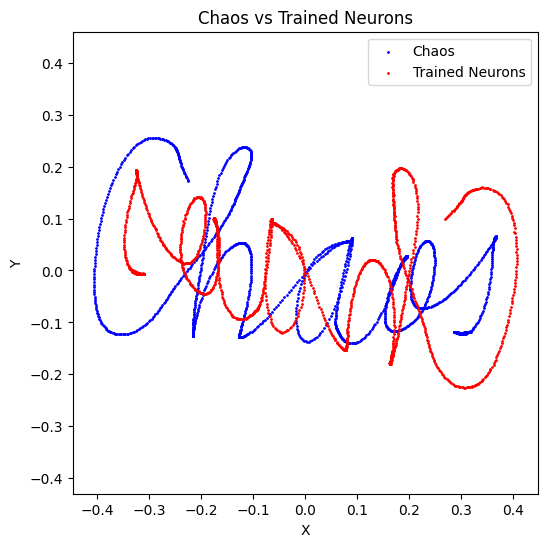

In [132]:
trained = neurons.detach()
print(f"Trained Neurons shape: {trained.shape}")
print(f"Chaos shape: {chaos.shape}")
# Visualize both on the same graph
plt.figure(figsize=(6, 6))
plt.scatter(chaos[:, 0], chaos[:, 1], s=1, label='Chaos', color='blue')
plt.scatter(trained[:, 0], trained[:, 1], s=1, label='Trained Neurons', color='red')
plt.title("Chaos vs Trained Neurons")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.legend()
plt.show()

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_14210/321146608.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_2d_to_2d(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)


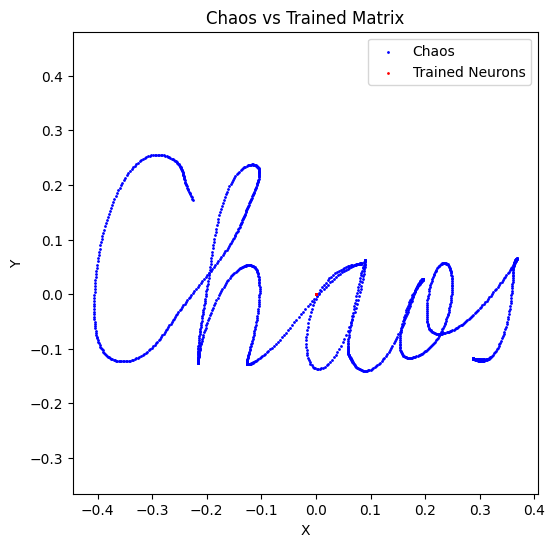

Procrustes Distance: 8.9470


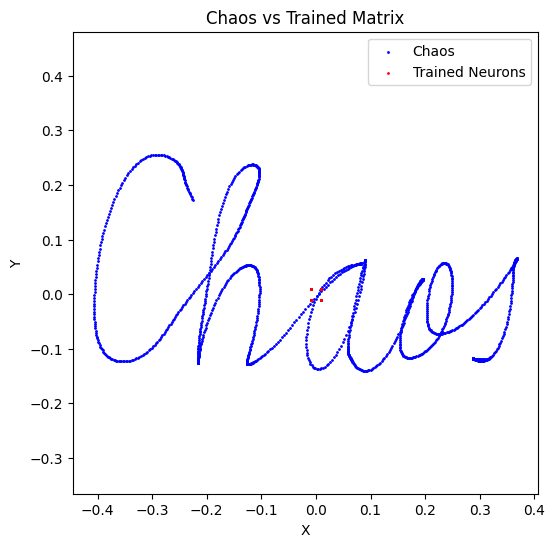

Procrustes Distance: 0.2025


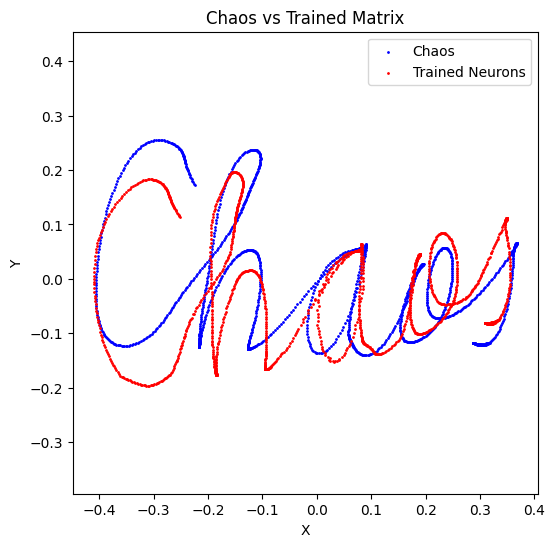

Procrustes Distance: 0.0285


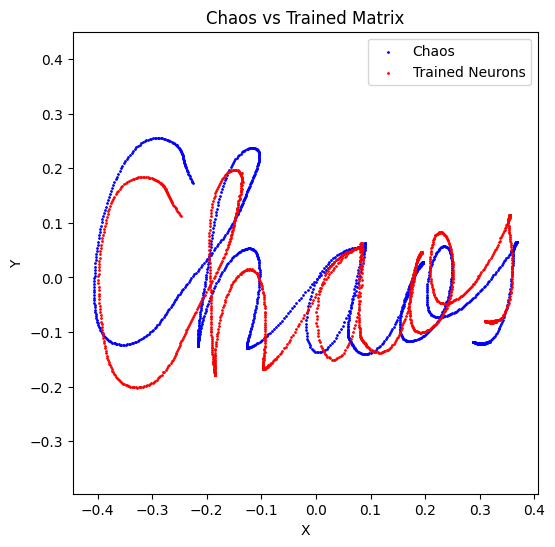

Procrustes Distance: 0.0181


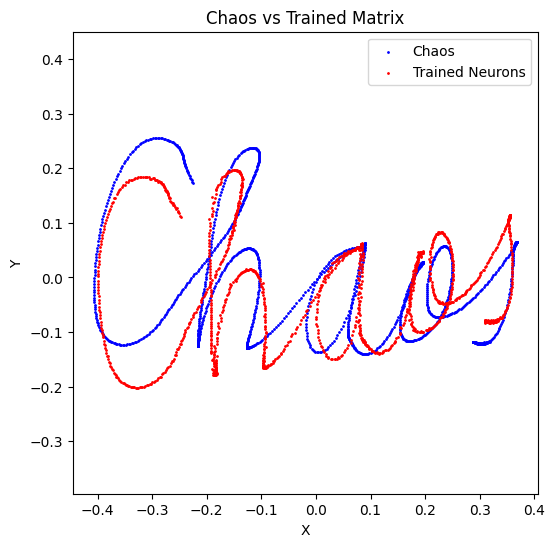

Final Procrustes Distance between A and B: 0.0192


In [133]:
neurons = torch.zeros_like(chaos, requires_grad=True)
train_2d_to_2d(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)

In [134]:
# Make N look like M
def train_3d_to_2d(N, M, epochs=750):
    if M.shape[1] == 2:
        M = torch.cat([M, torch.zeros(M.shape[0], 1, device=M.device, dtype=M.dtype)], dim=1)
    optimizer = torch.optim.Adam([N], lr=1e-2)
    metric = ProcrustesDistance()

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(M[:, 0], M[:, 1], M[:, 2], s=10, label='Chaos', color='blue')
    ax.scatter(N.detach()[:, 0], N.detach()[:, 1], N.detach()[:, 2], s=10, label='Trained Neurons', color='red')
    ax.set_title("Chaos vs Trained Matrix (3D)")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

    for i in range(epochs):
        optimizer.zero_grad()
        loss = metric(N, M)
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(f"Procrustes Distance: {loss.item():.4f}")
            fig = plt.figure(figsize=(7, 7))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(M[:, 0], M[:, 1], M[:, 2], s=10, label='Chaos', color='blue')
            ax.scatter(N.detach()[:, 0], N.detach()[:, 1], N.detach()[:, 2], s=10, label='Trained Neurons', color='red')
            ax.set_title("Chaos vs Trained Matrix (3D)")
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.legend()
            plt.show()
    print(f"Final Procrustes Distance between A and B: {metric(N, M).item():.4f}")


/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_14210/2589923887.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_3d_to_2d(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)


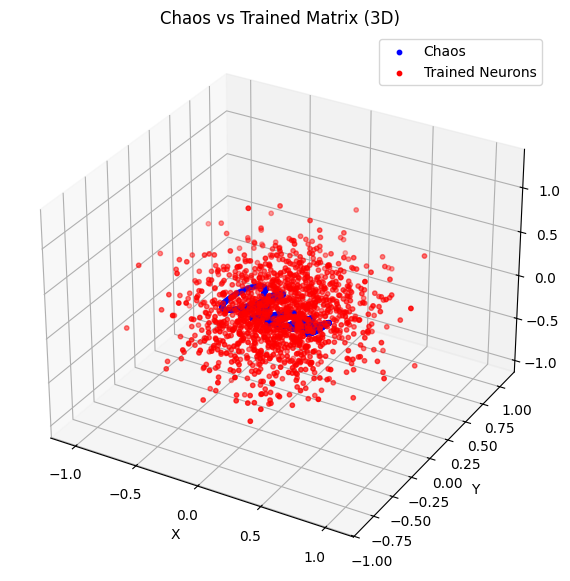

Procrustes Distance: 20.6625


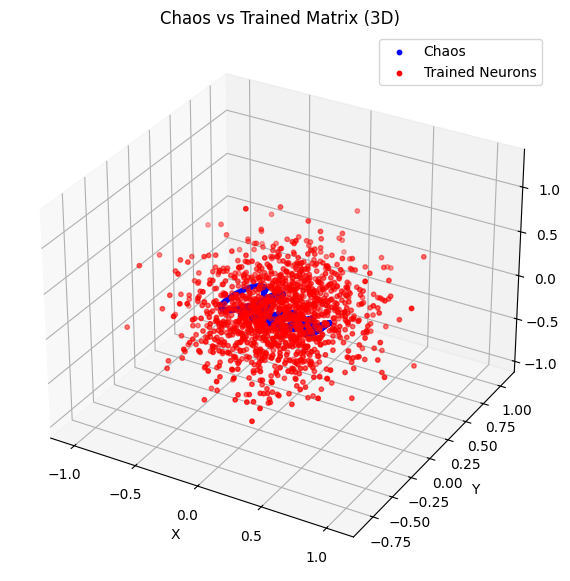

Procrustes Distance: 3.9915


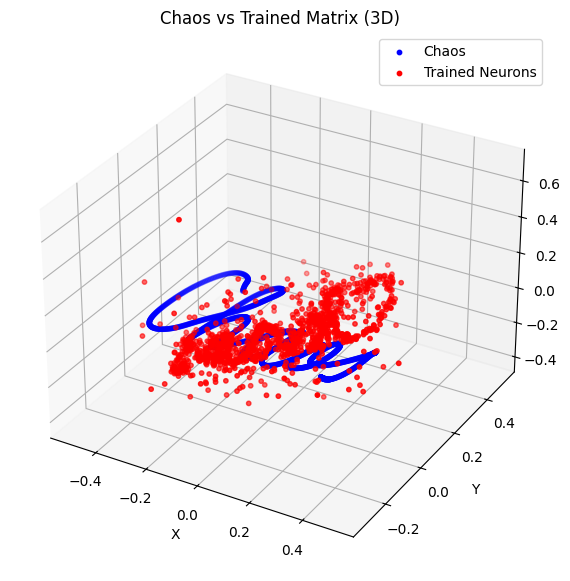

Procrustes Distance: 0.1324


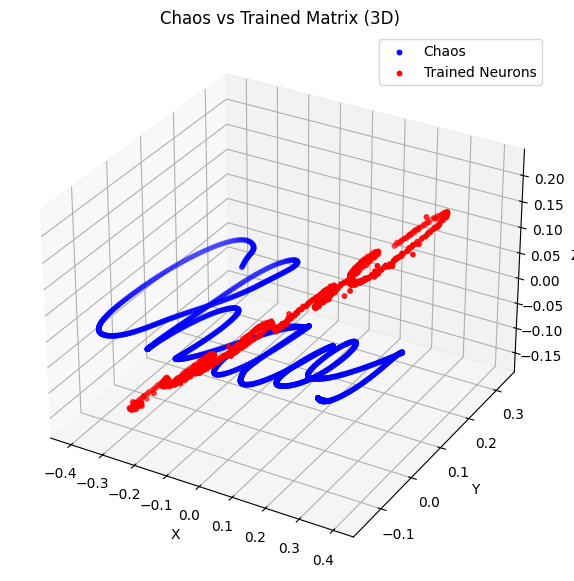

Procrustes Distance: 0.0370


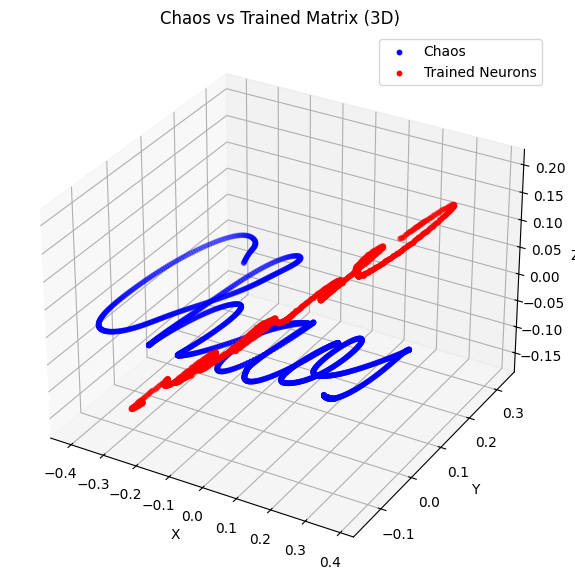

Final Procrustes Distance between A and B: 0.0300


In [135]:
neurons = torch.normal(mean=0, std=0.3, size=(1322, 3), requires_grad=True)
train_3d_to_2d(neurons, torch.tensor(chaos, dtype=torch.float32), epochs=200)

In [136]:
# Make N look like M
def train_2d_to_3d(N, M, epochs=750):
    if N.shape[1] == 2:
        N = torch.nn.Parameter(
            torch.cat([
                N.detach(), 
                torch.zeros(N.shape[0], 1, device=N.device, dtype=N.dtype)
            ], dim=1)
        )
    optimizer = torch.optim.Adam([N], lr=1e-2)
    metric = ProcrustesDistance()

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(M[:, 0], M[:, 1], M[:, 2], s=10, label='Chaos', color='blue')
    ax.scatter(N.detach()[:, 0], N.detach()[:, 1], N.detach()[:, 2], s=10, label='Trained Neurons', color='red')
    ax.set_title("Chaos vs Trained Matrix (3D)")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()
    plt.show()

    for i in range(epochs):
        optimizer.zero_grad()
        loss = metric(N, M)
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(f"Procrustes Distance: {loss.item():.4f}")
            fig = plt.figure(figsize=(7, 7))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(M[:, 0], M[:, 1], M[:, 2], s=10, label='Chaos', color='blue')
            ax.scatter(N.detach()[:, 0], N.detach()[:, 1], N.detach()[:, 2], s=10, label='Trained Neurons', color='red')
            ax.set_title("Chaos vs Trained Matrix (3D)")
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")
            ax.legend()
            plt.show()
    print(f"Final Procrustes Distance between A and B: {metric(N, M).item():.4f}")


/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_14210/3952030219.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_2d_to_3d(neurons, torch.tensor(chaos_3d, dtype=torch.float32), epochs=200)


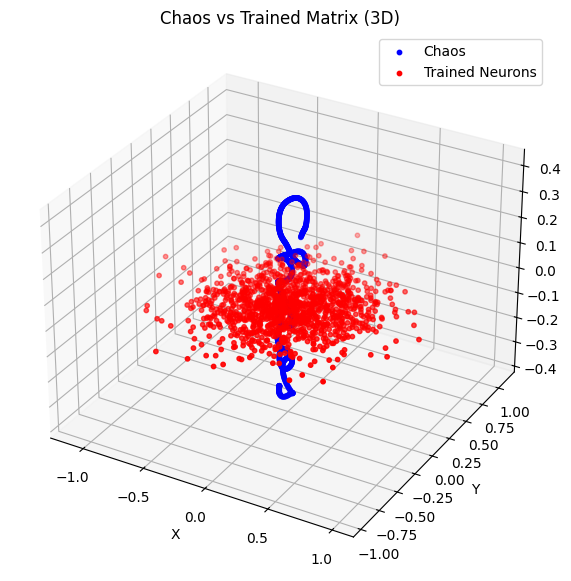

Procrustes Distance: 17.7257


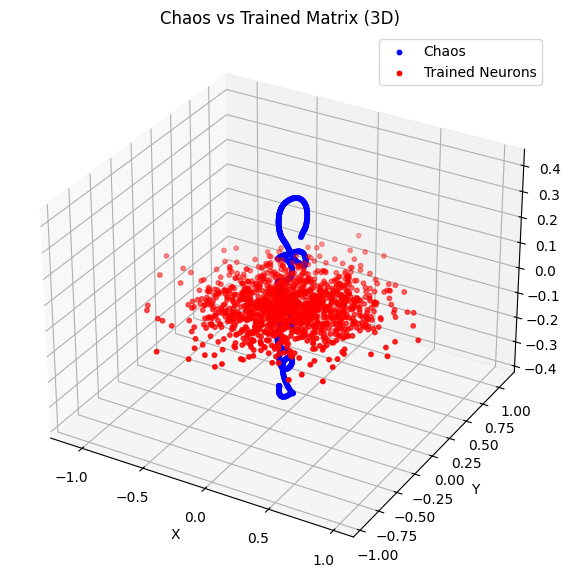

Procrustes Distance: 2.6191


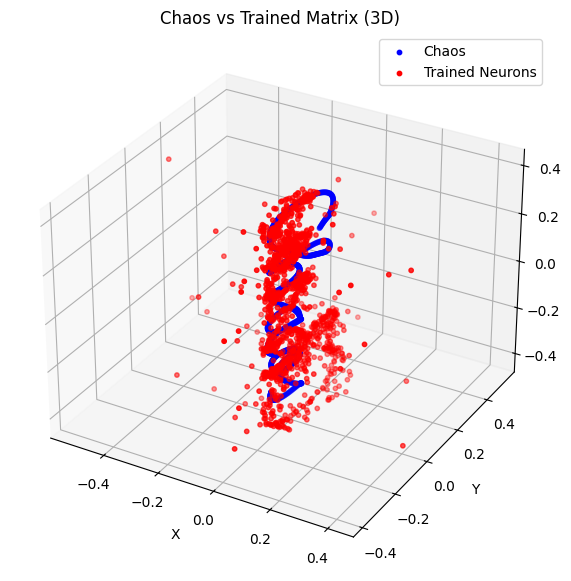

Procrustes Distance: 0.0815


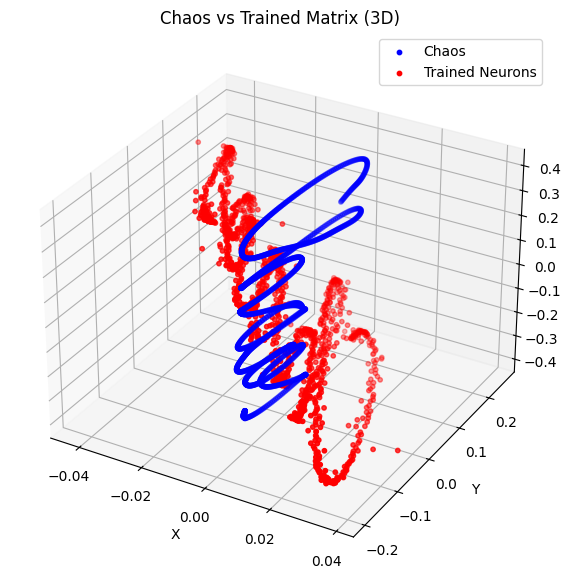

Procrustes Distance: 0.0323


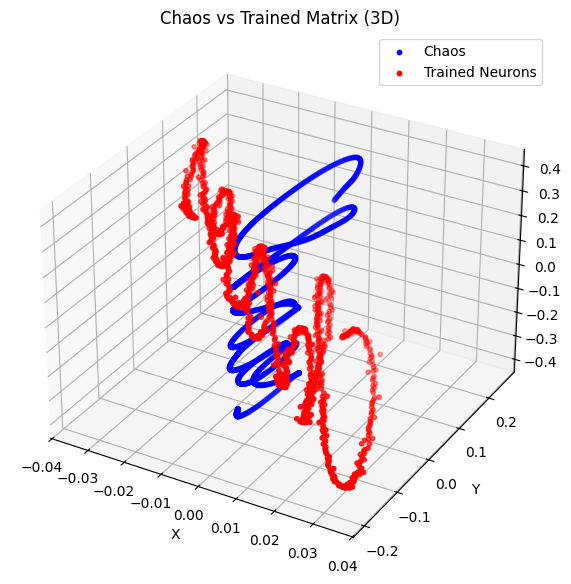

Final Procrustes Distance between A and B: 0.0250


In [137]:
chaos_added = torch.cat([chaos, torch.zeros(chaos.shape[0], 1)], axis=1)

theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
R = torch.tensor([[c, 0, s], [0, 1, 0], [-s, 0, c]], dtype=torch.float64)
chaos_3d = chaos_added @ R.T

neurons = torch.normal(mean=0, std=0.3, size=(1322, 2), requires_grad=True)
train_2d_to_3d(neurons, torch.tensor(chaos_3d, dtype=torch.float32), epochs=200)


In [138]:
def train_10d_to_2d(N, M, epochs=750):
    if N.shape[1] == 2:
        N = torch.nn.Parameter(
            torch.cat([
                N.detach(), 
                torch.zeros(N.shape[0], 8, device=N.device, dtype=N.dtype)
            ], dim=1)
        )
    optimizer = torch.optim.Adam([N], lr=1e-2)
    metric = ProcrustesDistance()

    # plt.figure(figsize=(6, 6))
    # plt.scatter(M[:, 0], M[:, 1], s=1, label='Chaos', color='blue')
    # plt.scatter(N.detach()[:, 0], N.detach()[:, 1], s=1, label='Trained Neurons', color='red')
    # plt.title("Chaos vs Trained Matrix")
    # plt.xlabel("X")
    # plt.ylabel("Y")
    # plt.axis('equal')
    # plt.legend()
    # plt.show()
    for i in range(epochs):
        optimizer.zero_grad()
        loss = metric(N, M)
        loss.backward()
        optimizer.step()
        if i % 50 == 0:
            print(f"Procrustes Distance: {loss.item():.4f}")
            # plt.figure(figsize=(6, 6))
            # plt.scatter(M[:, 0], M[:, 1], s=1, label='Chaos', color='blue')
            # plt.scatter(N.detach()[:, 0], N.detach()[:, 1], s=1, label='Trained Neurons', color='red')
            # plt.title("Chaos vs Trained Matrix")
            # plt.xlabel("X")
            # plt.ylabel("Y")
            # plt.axis('equal')
            # plt.legend()
            # plt.show()
    print(f"Final Procrustes Distance between A and B: {metric(N, M).item():.4f}")

    pca = PCA(n_components=2)
    N_2d = pca.fit_transform(N.detach().cpu().numpy())
    plt.figure(figsize=(6, 6))
    plt.scatter(N_2d[:, 0], N_2d[:, 1], s=1, label='Trained Neurons (PCA)', color='red')
    plt.title("Chaos vs Trained Neurons (PCA Reduced)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.legend()
    plt.show()

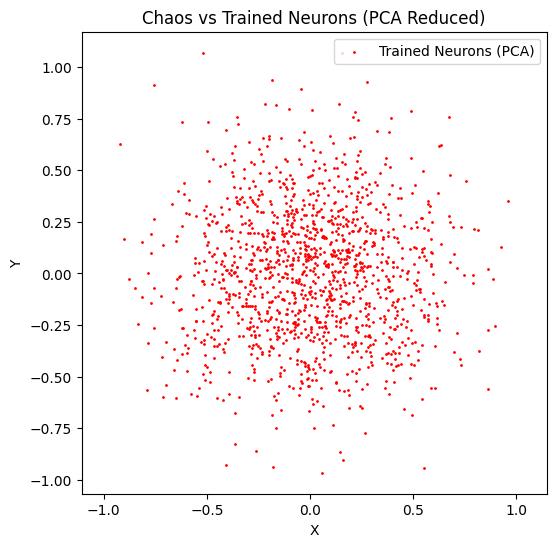

/var/folders/8v/z7_lynrn24bbpwy6p36j3cwc0000gn/T/ipykernel_14210/1356296799.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_10d_to_2d(neurons, torch.tensor(chaos_3d, dtype=torch.float32), epochs=200)


Procrustes Distance: 35.5388
Procrustes Distance: 5.5211
Procrustes Distance: 0.1677
Procrustes Distance: 0.0592
Final Procrustes Distance between A and B: 0.0475


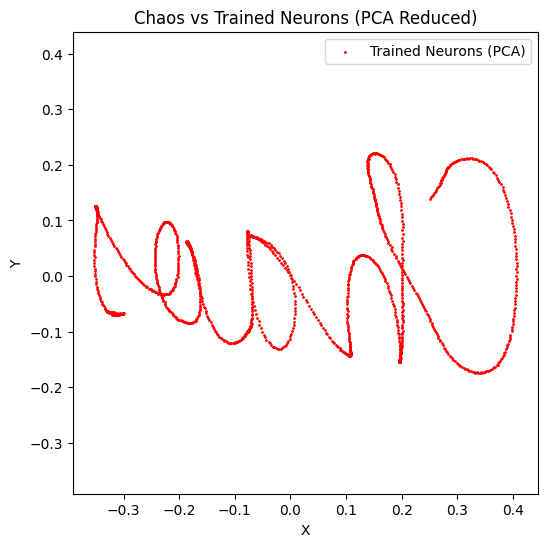

In [140]:
neurons = torch.normal(mean=0, std=0.3, size=(1322, 10), requires_grad=True)
neurons_2d = PCA(n_components=2).fit_transform(neurons.detach().cpu().numpy())
plt.figure(figsize=(6, 6))
plt.scatter(neurons_2d[:, 0], neurons_2d[:, 1], s=1, label='Trained Neurons (PCA)', color='red')
plt.title("Chaos vs Trained Neurons (PCA Reduced)")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.legend()
plt.show()
train_10d_to_2d(neurons, torch.tensor(chaos_3d, dtype=torch.float32), epochs=200)


In [ ]:
# Canonical train function
def train(N, M, epochs=750):
    optimizer = torch.optim.Adam([N], lr=1e-2)
    metric = ProcrustesDistance()
    for i in range(epochs):
        optimizer.zero_grad()
        loss = metric(N, M)
        loss.backward()
        optimizer.step()